<a href="https://colab.research.google.com/github/December04/MachineLearningProgramming/blob/main/Week06/Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os

In [26]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [27]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [28]:
selected_classes = ['cat', 'dog', 'horse']
selected_idx = [class_names.index(c) for c in selected_classes]

In [29]:
train_mask = np.isin(y_train, selected_idx).flatten()
test_mask = np.isin(y_test, selected_idx).flatten()

In [30]:
x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

In [31]:
label_map = {v: i for i, v in enumerate(selected_idx)}  # 🔥 오타 수정됨 (inenumerate → in enumerate)
y_train = np.array([label_map[int(y)] for y in y_train])
y_test = np.array([label_map[int(y)] for y in y_test])

/tmp/ipython-input-19497305.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_train = np.array([label_map[int(y)] for y in y_train])
/tmp/ipython-input-19497305.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_test = np.array([label_map[int(y)] for y in y_test])


In [32]:
x_train, x_test = x_train / 255.0, x_test / 255.0

print("✅ 데이터 준비 완료")
print(f"훈련 데이터: {x_train.shape}, 테스트 데이터: {x_test.shape}")
print(f"클래스: {selected_classes}\n")

✅ 데이터 준비 완료
훈련 데이터: (15000, 32, 32, 3), 테스트 데이터: (3000, 32, 32, 3)
클래스: ['cat', 'dog', 'horse']



In [34]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')  # 출력: 3개 클래스
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,907 (1.36 MB)

 Trainable params: 355,907 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [37]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.2,
    verbose=2
)

Epoch 1/15
188/188 - 20s - 106ms/step - accuracy: 0.4983 - loss: 0.9498 - val_accuracy: 0.5990 - val_loss: 0.8345
Epoch 2/15
188/188 - 21s - 111ms/step - accuracy: 0.6302 - loss: 0.7870 - val_accuracy: 0.6570 - val_loss: 0.7509
Epoch 3/15
188/188 - 19s - 104ms/step - accuracy: 0.6739 - loss: 0.7113 - val_accuracy: 0.6817 - val_loss: 0.7270
Epoch 4/15
188/188 - 17s - 91ms/step - accuracy: 0.7104 - loss: 0.6507 - val_accuracy: 0.7200 - val_loss: 0.6444
Epoch 5/15
188/188 - 21s - 110ms/step - accuracy: 0.7358 - loss: 0.6029 - val_accuracy: 0.7300 - val_loss: 0.6302
Epoch 6/15
188/188 - 17s - 91ms/step - accuracy: 0.7625 - loss: 0.5601 - val_accuracy: 0.7327 - val_loss: 0.6127
Epoch 7/15
188/188 - 17s - 90ms/step - accuracy: 0.7818 - loss: 0.5183 - val_accuracy: 0.7397 - val_loss: 0.6172
Epoch 8/15
188/188 - 17s - 93ms/step - accuracy: 0.8021 - loss: 0.4782 - val_accuracy: 0.7513 - val_loss: 0.6055
Epoch 9/15
188/188 - 20s - 108ms/step - accuracy: 0.8185 - loss: 0.4322 - val_accuracy: 0.73

In [38]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ 테스트 정확도: {test_acc*100:.2f}%")


✅ 테스트 정확도: 73.77%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


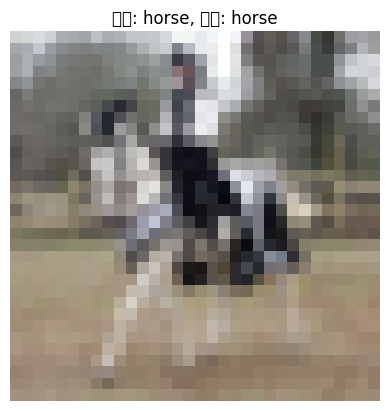

In [39]:
import matplotlib.pyplot as plt

idx = np.random.randint(0, len(x_test))
plt.imshow(x_test[idx])
plt.title(f"실제: {selected_classes[y_test[idx]]}, 예측: {selected_classes[np.argmax(model.predict(x_test[idx][None, ...]))]}")
plt.axis('off')
plt.show()